In [1]:
!pip install lxml
!pip install lightgbm
!pip install phik
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install phik
!pip install random
!pip install -U scikit-learn

  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [2]:
import requests
import lxml
from bs4 import BeautifulSoup
import pandas as pd
import numpy as mp
import json
from tqdm.notebook import tqdm
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, StandardScaler

from phik.report import plot_correlation_matrix
# from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from random import randint
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

In [3]:
data = pd.read_csv("total_data_lat.csv")

# Формирование дополнительных атрибутов

In [4]:
data.head()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories,lat,long
0,2869171,Дорожно-транспортные происшествия,Светлое время суток,Жилые дома индивидуальной застройки,Барнаул,NO_INFORMATII,Ясно,Наезд на пешехода,2023-05-24 19:30:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Пешеходы, Мотоциклисты",53.391200,83.787900
1,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",Пасмурно,Иной вид ДТП,2015-09-16 13:00:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Дети",53.345833,83.666389
2,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",Ясно,Падение пассажира,2017-08-25 15:30:00,Легкий,0,1,Алтайский край,Сухое,3,"Все участники, Дети",53.197060,83.396880
3,2576909,Дорожно-транспортные происшествия,Светлое время суток,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",Ясно,Столкновение,2021-05-29 19:40:00,Тяжёлый,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",3,"Все участники, Мотоциклисты",53.376400,83.714200
4,2575209,Дорожно-транспортные происшествия,Светлое время суток,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",Ясно,Столкновение,2021-05-25 16:40:00,Легкий,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",2,Все участники,53.343071,83.794366


In [7]:
uniq_region = data['region'].unique()
uniq_region

array(['Барнаул', 'Немецкий национальный район', 'Шипуновский район',
       'Чарышский район', 'Целинный район', 'Хабарский район',
       'Усть-Пристанский район', 'Усть-Калманский район',
       'Угловский район', 'Тюменцевский район', 'Троицкий район',
       'Третьсяковский район', 'Топчихинский район', 'Тогульский район',
       'Тальменский район', 'Табунский район', 'Шелаболихинский район',
       'Солтонский район', 'Солонешенский район', 'Советский район',
       'Суетский район', 'Славгородский район', 'Романовский район',
       'Родинский район', 'Ребрихинский район', 'Поспелихинский район',
       'Петропавловский район', 'Панкрушихинский район',
       'Павловский район', 'Зональный район', 'Новичихинский район',
       'Михайловский район', 'Мамонтовский район', 'Локтевский район',
       'Кытмановский район', 'Курьинский район', 'Кулундинский район',
       'Крутихинский район', 'Краснощековский район',
       'Красногорский район', 'Косихинский район', 'Ключевский рай

In [8]:
len(uniq_region)

150

In [11]:
def total_incidents_on_region(row):
    region = row['region']
    return data[data['region'] == region]['id'].count()

def total_incidents_on_address(row):
    region = row['region']
    address = row['address']
    return data[(data['address'] == address) & (data['region'] == region)]['id'].count()

def severity_to_number(value):
    if value == 'Легкий':
        return 3
    elif value == 'Тяжёлый':
        return 2
    else:
        return 1

def danger_level_value(row):
    severity_num = row['severity_num']
    total_incidents_region = row['total_incidents_region']
    total_incidents_address = row['total_incidents_address']
    dead_count = row['dead_count']
    injured_count = row['injured_count']
    participants_count = row['participants_count']

    danger_level = (2**(abs(severity_num-3)) * (total_incidents_address/total_incidents_region))/total_incidents_region
    return danger_level

In [13]:
data['total_incidents_region'] = data.apply(total_incidents_on_region, axis=1)
data['total_incidents_address'] = data.apply(total_incidents_on_address, axis=1)
data['severity_num'] = data['severity'].apply(severity_to_number)
data['danger_level'] = data.apply(danger_level_value, axis=1)
data['frequency'] = data['total_incidents_address']/data['total_incidents_region']
data.head()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,road_conditions,participants_count,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency
0,2869171,Дорожно-транспортные происшествия,Светлое время суток,Жилые дома индивидуальной застройки,Барнаул,NO_INFORMATII,Ясно,Наезд на пешехода,2023-05-24 19:30:00,Легкий,...,Сухое,2,"Все участники, Пешеходы, Мотоциклисты",53.391200,83.787900,10375,563,3,5.230367e-06,0.054265
1,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",Пасмурно,Иной вид ДТП,2015-09-16 13:00:00,Легкий,...,Сухое,2,"Все участники, Дети",53.345833,83.666389,10375,1,3,9.290173e-09,0.000096
2,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",Ясно,Падение пассажира,2017-08-25 15:30:00,Легкий,...,Сухое,3,"Все участники, Дети",53.197060,83.396880,10375,3,3,2.787052e-08,0.000289
3,2576909,Дорожно-транспортные происшествия,Светлое время суток,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",Ясно,Столкновение,2021-05-29 19:40:00,Тяжёлый,...,"Сухое, Отсутствие, плохая различимость горизон...",3,"Все участники, Мотоциклисты",53.376400,83.714200,10375,2,2,3.716069e-08,0.000193
4,2575209,Дорожно-транспортные происшествия,Светлое время суток,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",Ясно,Столкновение,2021-05-25 16:40:00,Легкий,...,"Сухое, Отсутствие, плохая различимость горизон...",2,Все участники,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096


In [18]:
data.danger_level.describe()

count    6.802700e+04
mean     9.602265e-05
std      7.699308e-03
min      9.290173e-09
25%      1.586987e-07
50%      2.297559e-06
75%      2.514964e-05
max      2.000000e+00
Name: danger_level, dtype: float64

In [17]:
data.total_incidents_address.describe()

count    68027.000000
mean         9.838402
std         52.877553
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        563.000000
Name: total_incidents_address, dtype: float64

In [19]:
data[data['danger_level'] == data['danger_level'].max()]

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,road_conditions,participants_count,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency
38890,2221936,Дорожно-транспортные происшествия,Светлое время суток,Нету информации,Новая Земля,"Прочие автомобильные дороги (ведомственные), 1 км",Пасмурно,Опрокидывание,2017-07-23 17:30:00,Тяжёлый,...,Мокрое,2,Все участники,71.5572,52.3364,1,1,2,2.0,1.0


In [20]:
data[data.total_incidents_address < 390].total_incidents_address.describe()

count    67464.000000
mean         5.222163
std         15.636342
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        158.000000
Name: total_incidents_address, dtype: float64

In [22]:
data = data.query('danger_level != 2')

In [23]:
data = data[data.total_incidents_address < 390]

In [25]:
total = data

<Axes: xlabel='severity', ylabel='danger_level'>

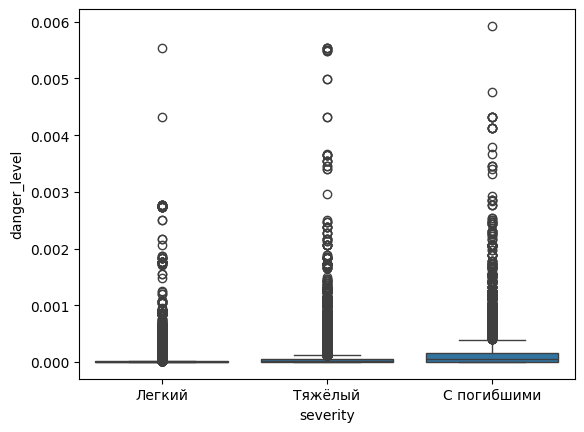

In [26]:
sns.boxplot(x="severity", y="danger_level", data=total[total['danger_level'] < 0.006])

<Axes: xlabel='severity', ylabel='total_incidents_address'>

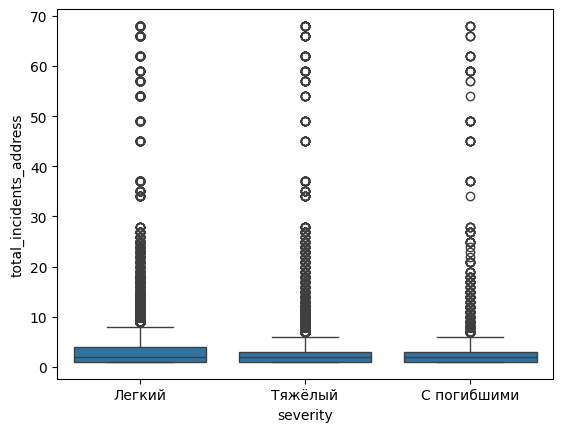

In [ ]:
sns.boxplot(x="severity", y="total_incidents_address", data=total[total['total_incidents_address'] < 80])

# Выделение данных для кластеризации

In [35]:
cat_col = ['light','weather','category','road_conditions','participant_categories']
encoder = LabelEncoder()

total[cat_col] = total[cat_col].apply(encoder.fit_transform)
total.head()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,road_conditions,participants_count,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency
1,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,1142,2,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096
2,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",21,15,2017-08-25 15:30:00,Легкий,...,1142,3,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289
3,2576909,Дорожно-транспортные происшествия,4,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",21,16,2021-05-29 19:40:00,Тяжёлый,...,1274,3,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193
4,2575209,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",21,16,2021-05-25 16:40:00,Легкий,...,1331,2,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096
5,2547743,Дорожно-транспортные происшествия,4,"Эстакада, путепровод",Барнаул,"г Барнаул, Объездная дорога в обход г. Барнаул...",21,16,2021-02-22 13:50:00,Тяжёлый,...,665,4,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157


In [37]:
data_for_models = total[['id', 'total_incidents_address','danger_level', 'frequency']]
print(data_for_models.shape)

(67463, 4)


In [38]:
data_for_models.head()

,id,total_incidents_address,danger_level,frequency
1,2320091,1,9.290173e-09,0.000096
2,2321011,3,2.787052e-08,0.000289
3,2576909,2,3.716069e-08,0.000193
4,2575209,1,9.290173e-09,0.000096
5,2547743,12,2.229641e-07,0.001157


# Кластеризация набора данных

In [39]:
wcss = []
for clusters in range(1, 11):

    model = KMeans(n_clusters=clusters, max_iter=300, n_init=10, random_state=45)
    model.fit(data_for_models.drop('id', axis=1))

    wcss.append(model.inertia_)

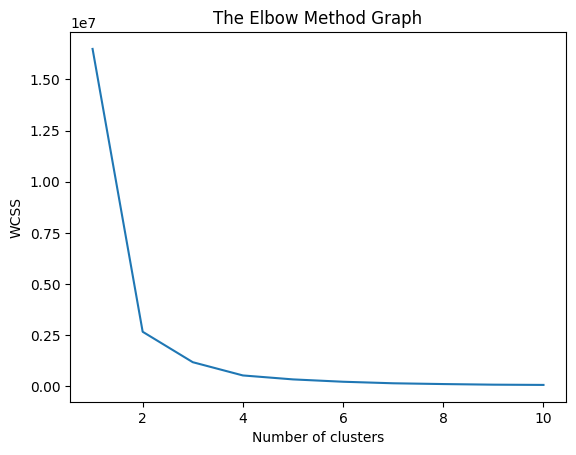

In [40]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
model = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=45)
data_for_models['clusters'] = model.fit_predict(data_for_models.drop('id', axis=1))

C:\Users\tooer\AppData\Local\Temp\ipykernel_6792\4106042549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_models['clusters'] = model.fit_predict(data_for_models.drop('id', axis=1))


In [42]:
data_for_models.clusters.value_counts()

clusters
3    57354
0     8793
1      713
2      603
Name: count, dtype: int64

In [43]:
print("Максимальный уровень опасности дороги в кластере 0:", data_for_models[data_for_models.clusters == 0]['danger_level'].max())
print("Максимальный уровень опасности дороги в кластере 1:", data_for_models[data_for_models.clusters == 1]['danger_level'].max())
print("Максимальный уровень опасности дороги в кластере 2:", data_for_models[data_for_models.clusters == 2]['danger_level'].max())
print("Максимальный уровень опасности дороги в кластере 3:", data_for_models[data_for_models.clusters == 3]['danger_level'].max())

Максимальный уровень опасности дороги в кластере 0: 0.0625
Максимальный уровень опасности дороги в кластере 1: 0.0001260574274393435
Максимальный уровень опасности дороги в кластере 2: 0.00124719249570617
Максимальный уровень опасности дороги в кластере 3: 0.03324099722991689


In [44]:
data_for_graphic = data_for_models.copy()

Text(0, 0.5, 'Уровень опасности дороги')

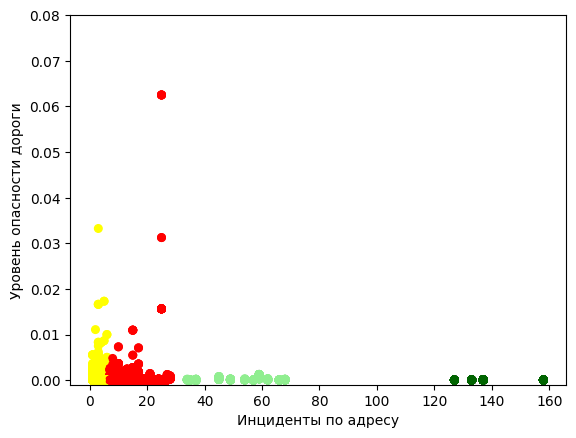

In [46]:
colors = [ 'red', 'darkgreen', 'lightgreen', 'yellow']#, '#93df20'], '#46df20']
data_for_graphic['color'] = data_for_graphic.clusters.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
plt.scatter(data_for_graphic.total_incidents_address, data_for_graphic.danger_level, c=data_for_graphic.color, s=30)
plt.ylim(-0.001, 0.08)
plt.xlabel('Инциденты по адресу')
plt.ylabel('Уровень опасности дороги')

In [47]:
gaussian_data = data_for_models.drop('clusters', axis=1).copy()
gaussian_data.head(2)

,id,total_incidents_address,danger_level,frequency
1,2320091,1,9.290173e-09,0.000096
2,2321011,3,2.787052e-08,0.000289


In [48]:
gm = GaussianMixture(n_components=4, random_state=0).fit(gaussian_data.drop('id', axis=1))
gaussian_data['clusters'] = gm.predict(gaussian_data.drop('id', axis=1))
gaussian_data['clusters'].value_counts()

clusters
0    52788
3    11179
2     2783
1      713
Name: count, dtype: int64

In [49]:
print("Максимальный уровень опасности дороги в кластере 0:", gaussian_data[gaussian_data.clusters == 0]['danger_level'].max())
print("Максимальный уровень опасности дороги в кластере 1:", gaussian_data[gaussian_data.clusters == 1]['danger_level'].max())
print("Максимальный уровень опасности дороги в кластере 2:", gaussian_data[gaussian_data.clusters == 2]['danger_level'].max())
print("Максимальный уровень опасности дороги в кластере 3:", gaussian_data[gaussian_data.clusters == 3]['danger_level'].max())

Максимальный уровень опасности дороги в кластере 0: 0.0007304601899196494
Максимальный уровень опасности дороги в кластере 1: 0.0001260574274393435
Максимальный уровень опасности дороги в кластере 2: 0.0014109110454178983
Максимальный уровень опасности дороги в кластере 3: 0.0625


In [50]:
gaussian_data_for_graphic = gaussian_data.copy()

Text(0, 0.5, 'Уровень опасности дороги')

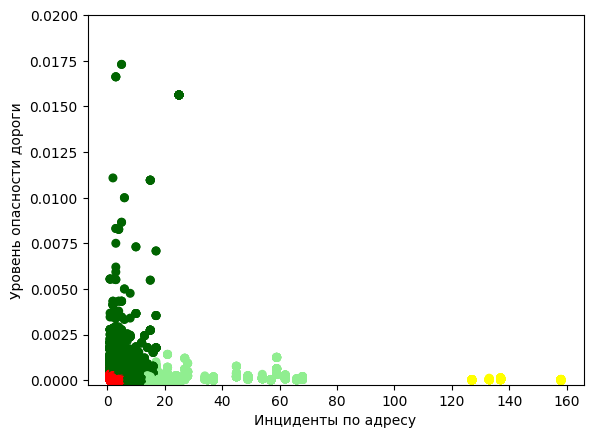

In [51]:
colors = [ 'red', 'yellow', 'lightgreen', 'darkgreen']
gaussian_data_for_graphic['color'] = gaussian_data_for_graphic.clusters.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
plt.scatter(gaussian_data_for_graphic.total_incidents_address,
            gaussian_data_for_graphic.danger_level,
            c=gaussian_data_for_graphic.color, s=30)
plt.ylim(-0.00025, 0.02)
plt.xlabel('Инциденты по адресу')
plt.ylabel('Уровень опасности дороги')

In [53]:
total_data_clusters = total.copy()
total_data_clusters = total_data_clusters.merge(gaussian_data_for_graphic, on=['id','total_incidents_address','danger_level','frequency'])
total_data_clusters.head()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red
1,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",21,15,2017-08-25 15:30:00,Легкий,...,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,red
2,2576909,Дорожно-транспортные происшествия,4,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",21,16,2021-05-29 19:40:00,Тяжёлый,...,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,red
3,2575209,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",21,16,2021-05-25 16:40:00,Легкий,...,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,red
4,2547743,Дорожно-транспортные происшествия,4,"Эстакада, путепровод",Барнаул,"г Барнаул, Объездная дорога в обход г. Барнаул...",21,16,2021-02-22 13:50:00,Тяжёлый,...,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,darkgreen


In [54]:
total_data_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       67463 non-null  int64  
 1   tags                     67463 non-null  object 
 2   light                    67463 non-null  int32  
 3   nearby                   67463 non-null  object 
 4   region                   67463 non-null  object 
 5   address                  67463 non-null  object 
 6   weather                  67463 non-null  int32  
 7   category                 67463 non-null  int32  
 8   datetime                 67463 non-null  object 
 9   severity                 67463 non-null  object 
 10  dead_count               67463 non-null  int64  
 11  injured_count            67463 non-null  int64  
 12  parent_region            67463 non-null  object 
 13  road_conditions          67463 non-null  int32  
 14  participants_count    

In [55]:
total_data_clusters.clusters.value_counts()

clusters
0    52788
3    11179
2     2783
1      713
Name: count, dtype: int64

In [56]:
total_data_clusters.to_csv("total_5_regions.csv", index=False)

# Разбиение данных

In [58]:
total_data_raz = total_data_clusters.copy()

In [64]:
train, test = train_test_split(total_data_raz, test_size=0.7, train_size=0.3, random_state=42)

# Подбор наиболее коррелируемых признаков

In [66]:
features_target = total_data_clusters[['light','weather','category','dead_count','injured_count','road_conditions','participants_count']]

c:\Users\tooer\lwjgl\.venv\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable road_conditions is large: 1406. Are you sure this is not an interval variable? Analysis for pairs of variables including road_conditions can be slow.
  warnings.warn(


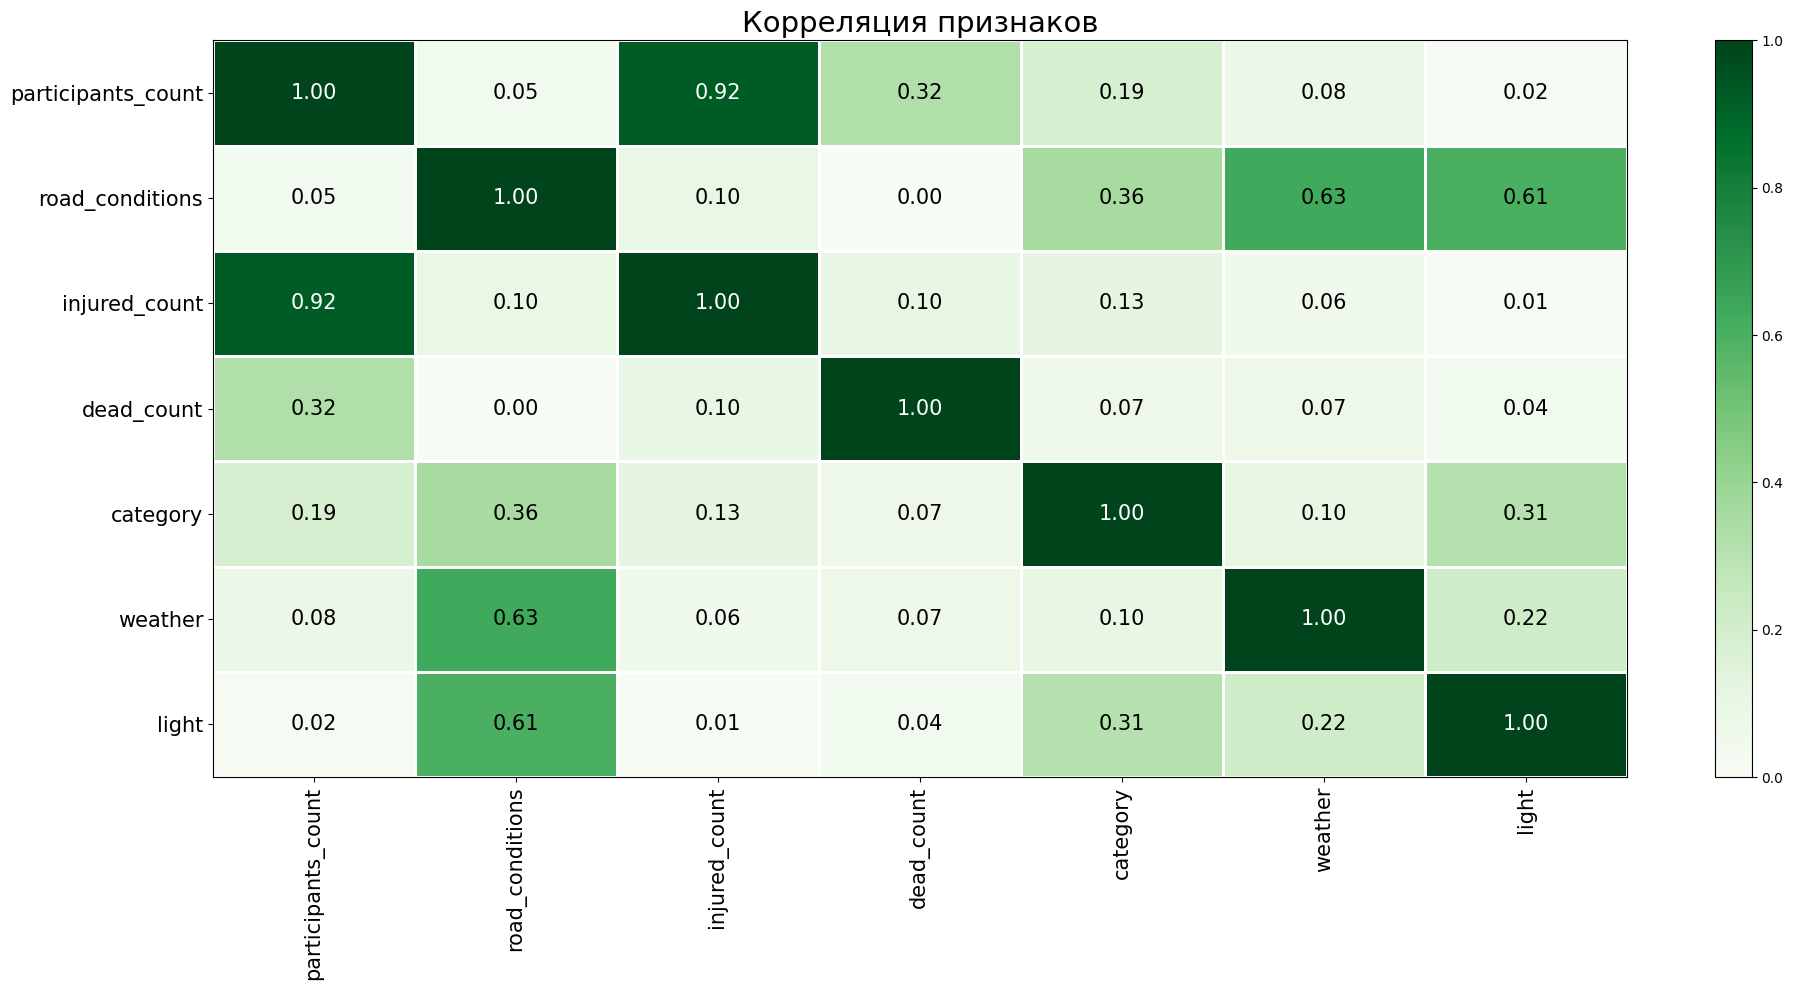

In [67]:
interval_cols = ['dead_count','injured_count','participants_count','total_incidents_region', 'total_incidents_address', 'danger_level', 'frequency']
phik_overview = features_target.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Корреляция признаков",
                        fontsize_factor=1.5,
                        figsize=(20, 10))
plt.tight_layout()

# Создание выборок

In [70]:
total_data_clusters.head(1)

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red


In [82]:
total = total_data_clusters[['danger_level', 'frequency']]

In [84]:
total_clusters = total_data_clusters[['clusters']]

In [85]:
most_corr_col = total#, 'total_incidents_address']#
features_train, features_valid, target_train, target_valid = train_test_split(total_clusters[most_corr_col], total_clusters['clusters'], test_size=0.20, random_state=69)
print(features_train.shape, features_valid.shape)

(53970, 1) (13493, 1)


<Axes: title={'center': 'Размерность классов'}, ylabel='Frequency'>

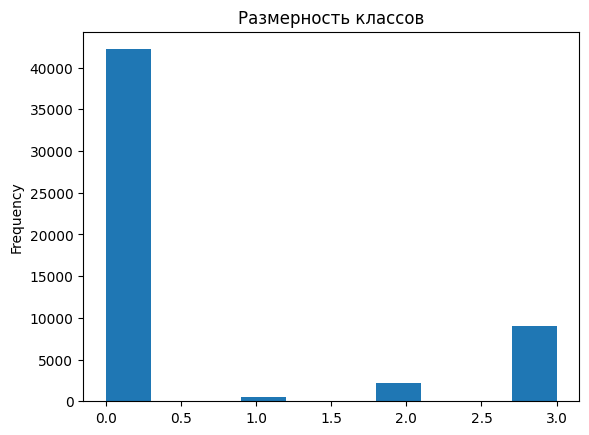

In [86]:
target_train.plot(kind='hist', title='Размерность классов')

# Выводы